period length is  396


Model error estimate without ENKF:   0%|          | 0/30 [00:00<?, ?it/s]c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:   3%|▎         | 1/30 [00:09<04:42,  9.76s/it]

This is the wealth groups data [[0.1600939697539756, 0.15988821638294012, 0.15958010585565172, 0.15978652919753744, 0.16048587271105094, 0.16060821007407117, 0.1606686278981708, 0.16033835713469788, 0.16044044171038022, 0.1603778682755058, 0.16062376377663592, 0.16031414125660526, 0.16107406827166448, 0.16092796827007558, 0.16063827644732118, 0.16110975288015197, 0.16098413554586952, 0.16104378061679261, 0.16180220778367513, 0.16151071887237028, 0.16126094118759685, 0.1609294528637023, 0.16080420615450638, 0.16069977292336615, 0.16038999415877653, 0.16018363227936283, 0.1602860349077775, 0.16022377887184536, 0.16009998274756518, 0.15989421701620765, 0.15985332242260467, 0.15960695168539768, 0.15948442351235625, 0.15938270322914191, 0.1591372998977215, 0.1592415921851836, 0.15967597560578348, 0.1595738615676901, 0.15973918570402434, 0.16050029459890558, 0.16046258246503983, 0.1603755798556854, 0.1605186999575887, 0.16103153423342145, 0.1611589182161477, 0.16154162081088871, 0.1627512570

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:   7%|▋         | 2/30 [00:19<04:32,  9.74s/it]

This is the wealth groups data [[0.21816877541547935, 0.2181725396845188, 0.21955354960004073, 0.21924612701448282, 0.22060437404100866, 0.22158982068023345, 0.22162766468288111, 0.22230266753382566, 0.2218457017111323, 0.22206802391015806, 0.22202266083461242, 0.22158682661492995, 0.22125466840027763, 0.222526562582336, 0.22223358468581042, 0.22200287709723876, 0.2223687683508463, 0.22248723522969938, 0.2220504460299304, 0.22241623950074135, 0.22284294910772304, 0.22316600146624763, 0.22278948505518517, 0.22296875516989542, 0.2227365363633577, 0.22258701898892455, 0.22212946865279262, 0.22228953947792207, 0.2218326006412876, 0.22232217803949875, 0.22209128833824623, 0.22245699785352402, 0.22236972316101394, 0.2221387357259114, 0.22203155923302684, 0.22332241245734458, 0.22411726770523138, 0.22519827333629003, 0.22496147152760307, 0.2250746088404489, 0.22467361307146283, 0.22624681957371306, 0.2257817461439374, 0.22605764546387935, 0.22616852947931682, 0.22595028923075908, 0.2256708295

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  10%|█         | 3/30 [00:29<04:22,  9.72s/it]

This is the wealth groups data [[0.1948765294313564, 0.19513373349598098, 0.1954931889547063, 0.1955641212267873, 0.1952648993184361, 0.19523352075985756, 0.1953460988477393, 0.19498565704465642, 0.19573598128221034, 0.19537473803598968, 0.19534313369271636, 0.19557882258399595, 0.19517679035219707, 0.19477558453868454, 0.19532078039510073, 0.19496039063668147, 0.19474463384082472, 0.19475543678235968, 0.19451954526940776, 0.19525027162662867, 0.19544503936403995, 0.1951255062199503, 0.19505330215679004, 0.195310142847035, 0.19556645557502642, 0.19578112938472203, 0.1954609053732916, 0.1954291239042618, 0.1953357397033009, 0.19600312022757174, 0.19599078020122856, 0.19694459851215923, 0.19658087082986359, 0.197245691860018, 0.19854638292319493, 0.19887826731204533, 0.19865445692079978, 0.19910945527648669, 0.1987618335308148, 0.1995043954521811, 0.20092377964355793, 0.20075743255492193, 0.20067365149235086, 0.20061059867096692, 0.20040378331646225, 0.20027961717467385, 0.20091627903353

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  13%|█▎        | 4/30 [00:38<04:12,  9.72s/it]

This is the wealth groups data [[0.11383639056901339, 0.11366405631134116, 0.11349207630432503, 0.11332044981976663, 0.11308750806898, 0.11308116138101415, 0.11284871151203663, 0.11269896355013606, 0.1138034406708072, 0.1137133982276598, 0.11360298485528297, 0.1134311303868781, 0.11358852551345756, 0.11405393740821217, 0.11470339678726799, 0.11463206041312964, 0.11462253874017381, 0.11442803245403507, 0.11435726211938904, 0.1141838571570816, 0.11516194580341702, 0.1149868867316661, 0.1149766356769968, 0.11478140150846318, 0.11479212887030482, 0.11467949805699025, 0.11506044326368435, 0.11546116141928615, 0.11528548727929708, 0.11537740252403274, 0.11602414138546195, 0.11590897804467569, 0.11575293939256769, 0.11557666547317381, 0.11535964186148986, 0.11522528844663651, 0.11599567611804627, 0.11577779118721503, 0.11564257822374382, 0.11598043167953413, 0.11623536656041689, 0.1160375449420785, 0.11734071947455742, 0.11744896600040751, 0.11720753766322986, 0.1184055270529461, 0.1183471365

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  17%|█▋        | 5/30 [00:48<04:03,  9.73s/it]

This is the wealth groups data [[0.2603720024507694, 0.2601656775551477, 0.2596925485128085, 0.2593231721388135, 0.25895455505565645, 0.25953227265296624, 0.2592043377836832, 0.25906208120394875, 0.2588173369438257, 0.25916922037969375, 0.25900647996670595, 0.2597485389923529, 0.2597079438547965, 0.25923575573079743, 0.25897009844429675, 0.2584788710161865, 0.25856422193471423, 0.25912218588093255, 0.2593912185860487, 0.26054360715542607, 0.2602958174674959, 0.2600074250952374, 0.2596374014602893, 0.25939147457065853, 0.25951606158075785, 0.2592703841176342, 0.26017634882665475, 0.2600115381583503, 0.25978539821321134, 0.2596419472044572, 0.25943712301190824, 0.25892437954647024, 0.25876214242880496, 0.2587235749300632, 0.2583561903801671, 0.2586679097085405, 0.25848564377014244, 0.2587354289318754, 0.25882025246942203, 0.26024104298652645, 0.25982942708483525, 0.25939810128098045, 0.26034491549566013, 0.25980974994945555, 0.2593784645939609, 0.259420854264749, 0.2598742772124725, 0.25

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  20%|██        | 6/30 [00:59<04:06, 10.26s/it]

This is the wealth groups data [[0.12228980318320602, 0.12212064809375957, 0.12199295276118749, 0.1225644246218957, 0.1223741489993909, 0.12259538492107884, 0.12246671371850351, 0.12221497088874905, 0.12214874972802917, 0.12247322908423289, 0.12318760583257014, 0.12293438113549658, 0.12284612513292548, 0.12294305473552937, 0.12332756937870279, 0.12371129361278106, 0.12464924162039126, 0.12500969300161768, 0.12481439088037923, 0.12554451115235193, 0.1254714457817869, 0.12531630652190243, 0.1255520505591698, 0.12554063775256888, 0.12550869238549547, 0.1259907132019222, 0.12626618296874784, 0.1260682980041369, 0.12585026379160644, 0.1259204620599149, 0.12570273173925683, 0.1255882290888033, 0.12555618589288062, 0.12538031642038733, 0.12528703254819093, 0.1250500482858845, 0.12485466321024034, 0.12459801170657683, 0.12458856002421269, 0.12577137696911392, 0.1256361771907226, 0.12646738830036597, 0.12626908973765955, 0.12633842706648796, 0.12616094961742189, 0.12660051761121202, 0.126566393

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  23%|██▎       | 7/30 [01:09<03:54, 10.20s/it]c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm

This is the wealth groups data [[0.08664518758851598, 0.08654930364453312, 0.08647417282044502, 0.08681031684866447, 0.0866935374439717, 0.08653588604994146, 0.08641967076576557, 0.08708482315910525, 0.08694692345801208, 0.0870765354924289, 0.08759644548864846, 0.08741638205431457, 0.08758614110999396, 0.0876733271259617, 0.08800700617011294, 0.08801110297234747, 0.08783018716723329, 0.08838965999683594, 0.08826963409110468, 0.08845819522079573, 0.0886052567025159, 0.08899868813228858, 0.08939131082360131, 0.08965979031492946, 0.08951659750603048, 0.08937369904456532, 0.08921053830481132, 0.08902715693794953, 0.08925527294343456, 0.08948292003318727, 0.08979232325375806, 0.08979275015450669, 0.09069764108682384, 0.09073731905568735, 0.09122914791698931, 0.09145273750526807, 0.09169642350298882, 0.09167238031066954, 0.09158671847960152, 0.09143956467318592, 0.0913954934597464, 0.09149540498381481, 0.09202678756343935, 0.09198150925341325, 0.09201854810022078, 0.0920143987685753, 0.09219

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  30%|███       | 9/30 [01:29<03:28,  9.91s/it]

This is the wealth groups data [[0.11358080364301153, 0.11355288691498298, 0.11342224746933069, 0.11327132054573132, 0.11307959182650489, 0.11301159334919886, 0.11306707077367238, 0.11291687395202243, 0.11313699424717641, 0.11343888614524303, 0.11345237318443914, 0.11375361678891069, 0.11395146105309892, 0.1140461185249013, 0.11381168508802506, 0.11400940998689756, 0.11379560802882936, 0.1138905858724306, 0.11371814021078064, 0.11393661342135764, 0.11479187417845825, 0.11476146797133474, 0.11491612845322706, 0.11498824693206708, 0.11483410093673653, 0.11468027180423244, 0.11580123216422394, 0.11566597101543195, 0.11561321199238292, 0.1153961132555986, 0.11540557701470268, 0.11523001713413047, 0.11540427048605707, 0.11518760124986482, 0.11517693760601733, 0.11549519221296223, 0.11527833607788035, 0.11510303775404082, 0.11513365998041292, 0.11539033548694982, 0.11519425091623202, 0.11528635370662413, 0.11517270696371486, 0.11505929383328513, 0.11593280282687292, 0.11579727122115484, 0.11

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  33%|███▎      | 10/30 [01:39<03:17,  9.86s/it]

This is the wealth groups data [[0.11051365232267366, 0.11047148441657499, 0.11053218329421864, 0.11100387781235385, 0.1110840383216947, 0.11104069792895782, 0.11095633458549886, 0.11171494150662505, 0.1115264120833672, 0.11174939061481141, 0.11164301446054149, 0.11143407687000662, 0.11188336143318246, 0.11212616223946707, 0.11261513619185079, 0.11269198459513757, 0.11252200278074978, 0.11288682691853004, 0.11265477652387512, 0.11242320313249092, 0.11237710994980207, 0.11218721937172424, 0.11228550342237191, 0.11320582626658245, 0.11328146044613109, 0.11350083129653452, 0.11328807477387308, 0.1130757555939592, 0.1131927691883744, 0.11318620612543413, 0.11326188063618554, 0.11311128336297967, 0.11322822392643925, 0.11330381206531194, 0.11323535268041986, 0.11312592197945766, 0.11392118113357669, 0.11391312074553675, 0.11374062876115516, 0.11350682328966846, 0.11333516649117663, 0.1131227505094313, 0.1134041156662932, 0.11389046265497256, 0.11382079734991628, 0.1137718312696664, 0.114298

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  37%|███▋      | 11/30 [01:48<03:06,  9.81s/it]

This is the wealth groups data [[0.14410349025277203, 0.1439717189857611, 0.1437991065467158, 0.14364740495081826, 0.1435165712136961, 0.14365323468727398, 0.1433579408012416, 0.14308380994259293, 0.1429335787118729, 0.1429686604827346, 0.1430036701394356, 0.14289471568558346, 0.14290932132270062, 0.14298556499842444, 0.14275331163756858, 0.14282987600712363, 0.1425773866602184, 0.142674868682182, 0.14242269796865414, 0.14227382572107353, 0.14354362492123682, 0.14335133645257345, 0.14379667989299044, 0.14385054349194226, 0.14359595605884637, 0.14330077991488094, 0.14329399482486813, 0.14310221949634672, 0.1436508551254013, 0.14366390644072388, 0.14431416756824245, 0.14407918312919882, 0.1446874785717758, 0.14445172675386203, 0.144483687816472, 0.14453613920051703, 0.14436236653811207, 0.14418895108315094, 0.14403644812201893, 0.14419259895621125, 0.1441428685998112, 0.1442576886345266, 0.14406393233501885, 0.14382946228003773, 0.14439715900798447, 0.14424422805421194, 0.144153279527608

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  40%|████      | 12/30 [01:58<02:56,  9.81s/it]

This is the wealth groups data [[0.5662729485523662, 0.5667739543828983, 0.5671917062621646, 0.5675058193064987, 0.5674492782875006, 0.5678245299282296, 0.5680345620356202, 0.568429166586528, 0.5674457066031864, 0.5666903844494947, 0.5672110882185952, 0.5669290368221538, 0.5664420050045318, 0.5664082067850736, 0.5662922539586576, 0.5670604483735571, 0.5677448396037852, 0.5685922721632763, 0.5678140371063891, 0.5681268708861531, 0.5681718333355534, 0.5686483797939417, 0.5692678388070742, 0.5688787794465661, 0.5696622130149893, 0.5701768078871516, 0.5704436727090935, 0.5695177397647883, 0.5701148556991064, 0.5700323955188484, 0.5701762210711818, 0.5705664232233513, 0.5706474829652501, 0.5714478368037279, 0.5717532009373252, 0.570680683979458, 0.5709670690533252, 0.5711295293094723, 0.571435547756612, 0.5711859245937385, 0.5711629307840327, 0.570050515145389, 0.5693103945625372, 0.5692707000755753, 0.5698683238251926, 0.5699713746023168, 0.5705675580439277, 0.5698880426886109, 0.570093833

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  43%|████▎     | 13/30 [02:08<02:46,  9.79s/it]

This is the wealth groups data [[0.3650134270378679, 0.3647564491789522, 0.36519890426674534, 0.36448931268590196, 0.36439786036282307, 0.36416270388469796, 0.36442137529059165, 0.3653578636528378, 0.3663540950296558, 0.3657449089396012, 0.3654453154036542, 0.3661330267045504, 0.36542151493969377, 0.36555426260701246, 0.36581007352192124, 0.3652020057236014, 0.3644512957260733, 0.36388713307552123, 0.3651536159577535, 0.3663147153518481, 0.36568505419007885, 0.36604337635284706, 0.3669354184850363, 0.36716783427240646, 0.36641308331365186, 0.36568043984318904, 0.36536042280938824, 0.3646504992106949, 0.3639214789117564, 0.3652290032339391, 0.36456046182291957, 0.3638521826256827, 0.3634948117198724, 0.3647415450380313, 0.36430012187436267, 0.36517519142339766, 0.3662745784049367, 0.3663644604719113, 0.36723528656226057, 0.3664803969484402, 0.36669319205835976, 0.3673577822007664, 0.3666437528259806, 0.36617786345939113, 0.3662679443338082, 0.36590560758323976, 0.3652562313635827, 0.366

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  47%|████▋     | 14/30 [02:19<02:43, 10.25s/it]

This is the wealth groups data [[0.0753681229055636, 0.07527486409838152, 0.07528457709750375, 0.07517093400659586, 0.07509863656198348, 0.07574594845530033, 0.07612470146435231, 0.07598877539139859, 0.07593535281100731, 0.07588204004618268, 0.07572605676788001, 0.07565261821177255, 0.07549710653346671, 0.07536247054594965, 0.07535144744041576, 0.07573101138656893, 0.07586312285235215, 0.07611829887350231, 0.0761468341270196, 0.07601086255811872, 0.07593683855464037, 0.07588352273571806, 0.07578920447158029, 0.07577730417090717, 0.07570376027053213, 0.07556869948516617, 0.07545447235169112, 0.0755254842097012, 0.07571968621955835, 0.07558459269677864, 0.07553200095516953, 0.07543840527993012, 0.07565334231007664, 0.07551838516397438, 0.07684318290302708, 0.07678800400078957, 0.076712382503756, 0.07688358870236603, 0.07695166286585294, 0.07728682536454817, 0.07735407063391916, 0.07752395777708299, 0.07771405172054574, 0.07761597061724458, 0.077682539294954, 0.07795453134056707, 0.077917

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  50%|█████     | 15/30 [02:29<02:31, 10.12s/it]

This is the wealth groups data [[0.4127918825324671, 0.4124161351610576, 0.41173281986679866, 0.4121814903332532, 0.4116836615613408, 0.4114335283752187, 0.41229393447911306, 0.4132759080544115, 0.4131458379670775, 0.4138177200578829, 0.4136248681586905, 0.4134940807482448, 0.4140830229078222, 0.41432130208543544, 0.4137162946087566, 0.4144281161090339, 0.41409011733382717, 0.41352669712232437, 0.41300554711989573, 0.41217712808456614, 0.4127482213541001, 0.41305091241452846, 0.41259240849811213, 0.41186761881469436, 0.4122337881055073, 0.4120647481607702, 0.41296496876929184, 0.4139661189857773, 0.41350573376884237, 0.4138068676851856, 0.4132234737015843, 0.41338129568767573, 0.4125521042628138, 0.41336909897847957, 0.41264271272850583, 0.4125139442387911, 0.4117482038053442, 0.41203239448325063, 0.4114732041310912, 0.4107507150864829, 0.41113973630756806, 0.4104384887607681, 0.4100470230097971, 0.4101702624731706, 0.41025213656392556, 0.4099638339822231, 0.40998446434582564, 0.409676

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  53%|█████▎    | 16/30 [02:39<02:20, 10.01s/it]

This is the wealth groups data [[0.34410671242842006, 0.3445093910750968, 0.3443356733961938, 0.3448406614935394, 0.34581740001152306, 0.3461754501239463, 0.34677943647575676, 0.3464571603422073, 0.3466700032173436, 0.3474990891920704, 0.34834702691661673, 0.3495221179492082, 0.3488447516027094, 0.34962825511883877, 0.35082126847675277, 0.35149792895740534, 0.3509398372536849, 0.351739590128083, 0.35103710952053035, 0.351918886524501, 0.35195605409871983, 0.3532470625315489, 0.35441208104080624, 0.3549785801364241, 0.3554000225906998, 0.35621116311956397, 0.35732897657620316, 0.3578278116333493, 0.35775005270559873, 0.3571996651440453, 0.3570409733528694, 0.3578898527812806, 0.35824364275550996, 0.35919283007752023, 0.35861892071915846, 0.35798452302807515, 0.3575569896128111, 0.35799368790390346, 0.35923117332288274, 0.35861607310474375, 0.3593794906722058, 0.360059114874292, 0.3598739891716805, 0.3602853686130298, 0.36155925528973104, 0.3609804815028138, 0.3614923665395493, 0.3608520

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  57%|█████▋    | 17/30 [02:49<02:09,  9.98s/it]

This is the wealth groups data [[0.2730908781542278, 0.2732489727039996, 0.27309840196436597, 0.27282480461428643, 0.2732506743739768, 0.27305898809506357, 0.2732582602394302, 0.273087114387658, 0.27303965646762146, 0.272581175688953, 0.27218530542630526, 0.2717080248327409, 0.2715400656480737, 0.2712285595760231, 0.271616598538989, 0.27241496026149065, 0.272759448415433, 0.27226043159169266, 0.27200911279590423, 0.27225165510742844, 0.271959242311276, 0.2726130075499006, 0.2721554037916292, 0.2726237616143564, 0.2733378289277141, 0.27368042003091897, 0.27478287966762077, 0.2743002594950793, 0.27390085548020765, 0.2735228285017157, 0.2740294874847065, 0.27461732906109076, 0.2744639455253023, 0.2750714500495028, 0.27471157281505704, 0.2747429997375666, 0.27448657776956836, 0.275340708018818, 0.2762753065988095, 0.27638574318956843, 0.27690707317987295, 0.2777356718330957, 0.2779664426180307, 0.2782172950507249, 0.27867319203725505, 0.27820313095122984, 0.2796046340039413, 0.279235438347

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  60%|██████    | 18/30 [02:58<01:59,  9.95s/it]c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtab

This is the wealth groups data [[0.17391177836296556, 0.17412985353055704, 0.17451192858767534, 0.17470821406456322, 0.17517132432521865, 0.17483179780966693, 0.17465741739081403, 0.17436005930474144, 0.1747005491090714, 0.1744853264439958, 0.17470222262496685, 0.1748981169330385, 0.1747441562091201, 0.1744055077812303, 0.17429367170702534, 0.17434651368857745, 0.17423479888275115, 0.17387664147017257, 0.17372478049332624, 0.17404602015743204, 0.17440771152194356, 0.1741108667317709, 0.1739790803016544, 0.17362144854471925, 0.1740251247008383, 0.17473631136933948, 0.17499380366650233, 0.17463408604212188, 0.17540568899041603, 0.17560013725157345, 0.17542417743257635, 0.17512524319297776, 0.17525859987711132, 0.17662504367265927, 0.17671420532250517, 0.1767826276708175, 0.1765836811014099, 0.17624125134235094, 0.1762284218131963, 0.17613339457380225, 0.17669635533376601, 0.17709371070513638, 0.17800414978852241, 0.17763824409043374, 0.1772730905488541, 0.17709369180360263, 0.17744911836

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  67%|██████▋   | 20/30 [03:17<01:34,  9.44s/it]

This is the wealth groups data [[0.3347827859947401, 0.33421794193210663, 0.3337570390674031, 0.3340782124207174, 0.3343781695487612, 0.3344102818157136, 0.33466844429990117, 0.33589220907584316, 0.3356539808114165, 0.3365057113445622, 0.3364512261495569, 0.3360679566238476, 0.33726828853870217, 0.33673944731322686, 0.3365405895054519, 0.33621880434622764, 0.3373777141368688, 0.33686920399656917, 0.3373689841631774, 0.3379294050426284, 0.33772810115528645, 0.3384727880190608, 0.3384348153178412, 0.33856136883867766, 0.33930434283567956, 0.34002523355313563, 0.3409296465920975, 0.3408455115259953, 0.34191268656515433, 0.34149763442946857, 0.3412478836411032, 0.341183650426928, 0.3410578811886964, 0.3404184699654325, 0.34105484639821343, 0.3418132508182527, 0.34193285962009246, 0.3417027702025871, 0.34221317050117817, 0.34173583262810814, 0.34214338486020107, 0.3422212029964993, 0.34355277843002896, 0.3430110187941487, 0.34368317801952303, 0.3431205943133152, 0.34418309268759534, 0.34413

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\benchmarking_error_simple.py:95: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%'

This is the wealth groups data [[0.16113731152504512, 0.16158720611967783, 0.1614400513108683, 0.16215655186157094, 0.16182322251852446, 0.1615933584712718, 0.16212453969750537, 0.16203794840666758, 0.16248599165026553, 0.1621930971514317, 0.16206525289242696, 0.16265713215349784, 0.163473910973613, 0.16317898570577688, 0.16315189495553034, 0.16300152376911695, 0.1638587066984387, 0.1642413391255453, 0.16400650439279907, 0.16373104034549157, 0.16339447448066435, 0.16383972924646156, 0.16360572006381255, 0.16370108824150695, 0.1635495881322402, 0.16323395128161894, 0.16472789307297275, 0.16443039011694233, 0.16561353219623107, 0.165273096677266, 0.16501558504090313, 0.16469693468400748, 0.16439949536610543, 0.16412322348574135, 0.16526588493606878, 0.16492616404152985, 0.1646282535192867, 0.16437206742385174, 0.16407529590376085, 0.1637585784071584, 0.16360696012098833, 0.16335287339837304, 0.16334598122488783, 0.16467524456196705, 0.1650356424914927, 0.16469639488379864, 0.164419512696

Model error estimate without ENKF:  70%|███████   | 21/30 [03:20<01:08,  7.60s/it]c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  73%|███████▎  | 22/30 [03:22<00:48,  6.04s/it]

This is the wealth groups data [[0.45991782963537053, 0.45907520169782035, 0.4586043142399063, 0.45778494238797834, 0.45756337943770586, 0.45865785725502806, 0.4595650810755352, 0.4594220829511443, 0.45862158611282544, 0.45954944051302693, 0.45913924627080865, 0.4588326753280308, 0.45984231989545227, 0.45893817911389484, 0.45885813771245565, 0.45982661789802254, 0.46073143921173587, 0.46109994403568827, 0.4621254840215322, 0.46269668345070886, 0.4628967003492514, 0.4631374181339661, 0.46411765784251996, 0.4632663967294295, 0.46377358283410103, 0.46368360176678486, 0.4646421627184725, 0.4646737323205206, 0.46544525377184237, 0.4662357453027371, 0.4672096160835625, 0.46754424833309133, 0.4686182094556903, 0.4679632572060202, 0.4690158009924521, 0.46854503563875094, 0.46953471545825054, 0.47019346455928357, 0.46953527421196717, 0.46867287663547397, 0.46877838477631245, 0.4681642153112452, 0.4691546779457976, 0.4699581003973579, 0.4693003938650999, 0.46985684453477794, 0.46913767808229534,

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  77%|███████▋  | 23/30 [03:25<00:34,  4.96s/it]

This is the wealth groups data [[0.5367522078705607, 0.5376839049685377, 0.5379558942068693, 0.5377339798476846, 0.5380264221726534, 0.5388321638691116, 0.5393895770333341, 0.5398225082539385, 0.5390006322798784, 0.5398660394500099, 0.5396607546129772, 0.5405864728962656, 0.5396602464116012, 0.5388798160246413, 0.5398071396069014, 0.5404653287122929, 0.5402176999336914, 0.5392922314994901, 0.538738673832022, 0.5391112749886059, 0.5398942306387147, 0.5395038836658635, 0.5400188040001624, 0.539196524520161, 0.5393420682906481, 0.5396723170670134, 0.5398168827973581, 0.540475051874628, 0.5402068470884134, 0.5408231025129547, 0.5401225058392374, 0.5410061629044264, 0.54127132290248, 0.5415153818164342, 0.5416972709803946, 0.5406454250129231, 0.5414252270610708, 0.5414017413407173, 0.5404738389885536, 0.5394450639310745, 0.5402684454852658, 0.5393017606970814, 0.5400226567223875, 0.54039261852109, 0.5394462345032177, 0.5403312817131618, 0.5402483766471408, 0.5401861980216072, 0.540576379665

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  80%|████████  | 24/30 [03:27<00:25,  4.21s/it]

This is the wealth groups data [[0.20087403991629738, 0.20101613538266996, 0.2014662790672313, 0.20113436865036707, 0.20127592898445595, 0.2011088580169073, 0.20102435456343037, 0.20114558502204236, 0.2019654709815639, 0.20239310718924514, 0.2021004036239014, 0.2017466336786267, 0.2016813752328436, 0.20134902266385682, 0.20130513756875876, 0.201466902890568, 0.20119665925335567, 0.200824191026215, 0.20053471252817764, 0.20016360500009286, 0.1999371524660399, 0.19983450155225307, 0.199793729709881, 0.19977359769885403, 0.199362942678662, 0.1991586920083928, 0.198852081092916, 0.19903944494334666, 0.19918531160693595, 0.1990225381167878, 0.19886009922416245, 0.19933523088176672, 0.19968604973378504, 0.200138927545154, 0.20024142206871237, 0.20046704202828552, 0.20007551758315859, 0.20060981888625806, 0.2012046899404786, 0.20120221357734783, 0.20142585853191092, 0.20132014743085916, 0.2009679813818271, 0.2015415601758212, 0.2029156447258606, 0.20350577591972172, 0.20308744902626755, 0.202

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  83%|████████▎ | 25/30 [03:30<00:18,  3.69s/it]

This is the wealth groups data [[0.0678602663199536, 0.06786466476092731, 0.06799239028442573, 0.06826374539970455, 0.06816453434494078, 0.06808608324928764, 0.06825446566580691, 0.06821694174846782, 0.06896062375050772, 0.06883942417050463, 0.0690062580178697, 0.06888496463197237, 0.06874336455634822, 0.0688281717814086, 0.06876891253193139, 0.06899755938515087, 0.06889683990084242, 0.06887855153836006, 0.06879863270748884, 0.06867776611660852, 0.0687421521652957, 0.06860084565527307, 0.06860372175983495, 0.06850381184896284, 0.06873300364369396, 0.06859171593939126, 0.06851238672836991, 0.06847433262796171, 0.06837468868965639, 0.06837802968294406, 0.06846358789112504, 0.06838452206038449, 0.06834673079885194, 0.06839124130376067, 0.0684562163334451, 0.06835660963503222, 0.0682572076883544, 0.06815801007252355, 0.06801790432619374, 0.0680630907674791, 0.06804651626143787, 0.06790663970201652, 0.0682192831276929, 0.06844905980025147, 0.068431691895469, 0.06845547173351056, 0.068520314

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  87%|████████▋ | 26/30 [03:32<00:13,  3.34s/it]

This is the wealth groups data [[0.13495155118586835, 0.1347563685810666, 0.1344793631113844, 0.13512794798448574, 0.13487073471607566, 0.1346551622171146, 0.13437836478744328, 0.1341638044051248, 0.1342785814041558, 0.1356059276863796, 0.13553273606786032, 0.1352746907162297, 0.13507884386514155, 0.1351711838865063, 0.13559223042411636, 0.13535461879642566, 0.13556972805824083, 0.13529105064513683, 0.1350335021025605, 0.13510537930788463, 0.13534155692756883, 0.1362967097832026, 0.13675655472877699, 0.13647543767231682, 0.13621545450132036, 0.13620267800020538, 0.13684772042366095, 0.13749143689657795, 0.1372499212561383, 0.13700890207574823, 0.1369122704795138, 0.13809031080040138, 0.13817646044411194, 0.1380774288124831, 0.13797860075048107, 0.1376949716536938, 0.13850139468052394, 0.13846336317539212, 0.1399876674181745, 0.13978213256244007, 0.13974146836987195, 0.13953643960141, 0.13996906893101496, 0.13972246026504617, 0.13947635852836077, 0.13997077942272795, 0.13992972744728385

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  90%|█████████ | 27/30 [03:35<00:09,  3.08s/it]

This is the wealth groups data [[0.0891481427138417, 0.0891704498141007, 0.0890488189152078, 0.0888657699790574, 0.08872420936000146, 0.08882961198118448, 0.0893870303910749, 0.09000497103251454, 0.08981995662809628, 0.0900875549942232, 0.09101239594576416, 0.09090753475925871, 0.09080288912562501, 0.09069845860177196, 0.09057368672485804, 0.09057250745324112, 0.09071522275036781, 0.09052874835105085, 0.09034265726889444, 0.09034195290190453, 0.09015624579685932, 0.09009425655569195, 0.0900118387190753, 0.08992959030073386, 0.08982695493174962, 0.0900123148295029, 0.08990950941180638, 0.09013581165172292, 0.09015608849767257, 0.09011465560051121, 0.09046387226546738, 0.09042180668735704, 0.09027704747602844, 0.09027647797666427, 0.09025535362730269, 0.09006982453590526, 0.08990523283915294, 0.08980264753941711, 0.08974138515555834, 0.08970080472344386, 0.08968086372921104, 0.08984596791168067, 0.09001073270565174, 0.08982570645752627, 0.08974384065304626, 0.08982659129737515, 0.0898063

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  93%|█████████▎| 28/30 [03:37<00:05,  2.88s/it]

This is the wealth groups data [[0.23743907724487182, 0.23705377709041003, 0.23788207417877055, 0.23747530737823444, 0.237459941120943, 0.2376296106365151, 0.23751114708981894, 0.2380507197182016, 0.2379930586007918, 0.23764773172243311, 0.23804313144253272, 0.23765658959301394, 0.23743529048501213, 0.23830391537497303, 0.23824573378804778, 0.23822878384063642, 0.2384790970041714, 0.23860555949948056, 0.24015012746386916, 0.24056093927477426, 0.2409503505994104, 0.24055783266418593, 0.24053612996154733, 0.2404322477883833, 0.24030802313496755, 0.241294078953726, 0.24112697067706312, 0.24202911898291637, 0.24223050812835756, 0.2417531346160257, 0.2412561863730107, 0.2414180523189995, 0.2409629049131695, 0.2406731412745794, 0.24126788216316905, 0.24124471988131355, 0.24085159683998522, 0.2408087342544383, 0.24053984355003433, 0.2415254228382691, 0.24109061074203944, 0.24149948929357504, 0.24198975143616178, 0.24153342884444534, 0.24116026835303742, 0.24119899534433675, 0.2412787547696757

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:  97%|█████████▋| 29/30 [03:40<00:02,  2.75s/it]

This is the wealth groups data [[0.42948682200029753, 0.4300634454685768, 0.42959052657472613, 0.4295502562478224, 0.42936617655605464, 0.4289769150522665, 0.4284856736119233, 0.4294138073941426, 0.4297850207447814, 0.4305871474623811, 0.43128484522333466, 0.4313644281754846, 0.4316494077433695, 0.43141990099012706, 0.4314169822387187, 0.4317429658176851, 0.43264384788265536, 0.4337689943198682, 0.43431625932521667, 0.43535574386736814, 0.43466638590737894, 0.4357257067492633, 0.43594005320191603, 0.4350439339278365, 0.43480744937955634, 0.4350236834039546, 0.43431445200747826, 0.4336066785085264, 0.43322925624082526, 0.43233870928657947, 0.43295058245078294, 0.4328006250827705, 0.4321165194302341, 0.43291385351431766, 0.43319564808027433, 0.4338263157399851, 0.4344556869979504, 0.43549488493228816, 0.43492857707760746, 0.4358640228348124, 0.43665365354315583, 0.4377911134362283, 0.4381862184205814, 0.4391560798048342, 0.4388494742590079, 0.4383379387655606, 0.4391841521491903, 0.43953

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF: 100%|██████████| 30/30 [03:43<00:00,  7.45s/it]

This is the wealth groups data [[0.11454643624630854, 0.11476320680984355, 0.11456841136613022, 0.11437401634433345, 0.11426224500399117, 0.11415070342104697, 0.11422439530916477, 0.11512017654254561, 0.11513020751772722, 0.11590079063769072, 0.11584754891894089, 0.11583552868530109, 0.1156179729538634, 0.11556531259572879, 0.11610888508551916, 0.11595243550408499, 0.11620742793396362, 0.11607133180830802, 0.11585329135948351, 0.11582070330100967, 0.11607596651987753, 0.1159606966472378, 0.11613344801284765, 0.11704586101420779, 0.11814140264347014, 0.11890579594451209, 0.11870248498601427, 0.11847903593328132, 0.11825604620288292, 0.11803351485063496, 0.11779088491363297, 0.11830932649170647, 0.11814835367837123, 0.11790548767843768, 0.11768367693501694, 0.11766788235283368, 0.11759045217604167, 0.1184998701566329, 0.11827683759936186, 0.11805426350827639, 0.11816104327153658, 0.11911040038521666, 0.11960557354389884, 0.11948304820376787, 0.1194018867683023, 0.11938256023043564, 0.119


c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
C:\Users\yoswald\AppData\Local\Temp\ipykernel_46672\1512733922.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
C:\Users\yoswald\AppData\Local\Temp\ipykernel_46672\1512733922.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tick

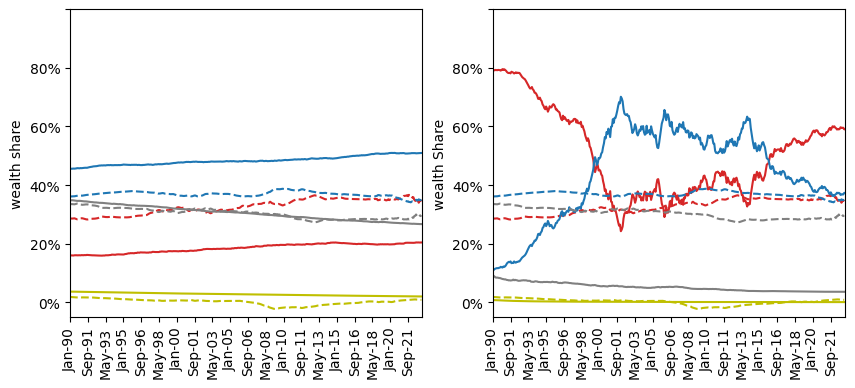

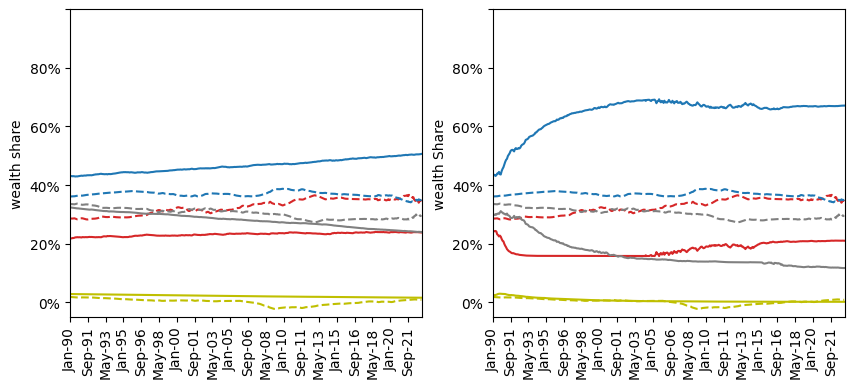

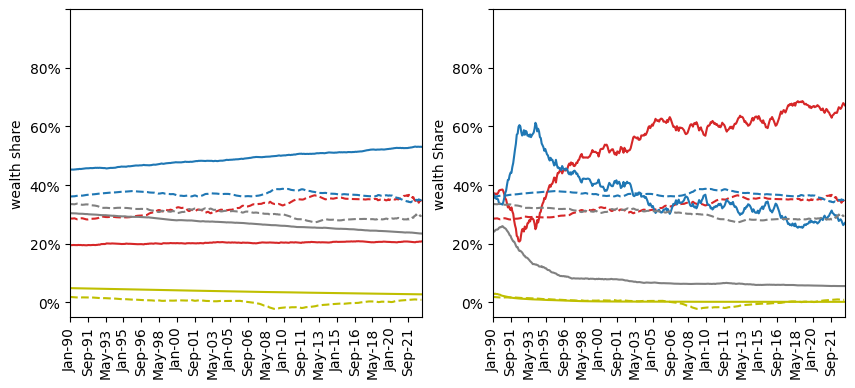

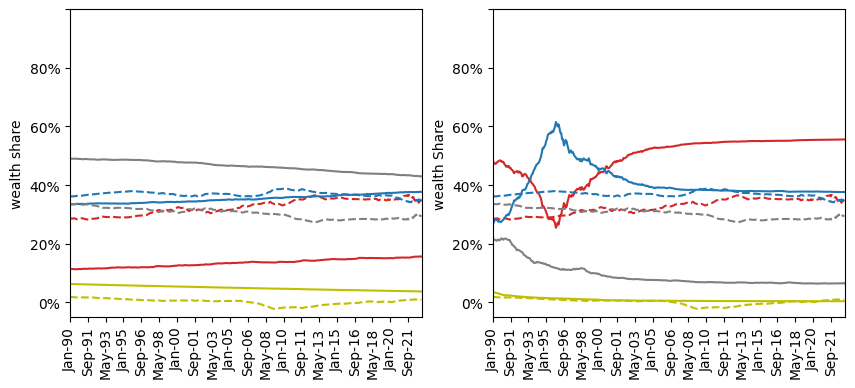

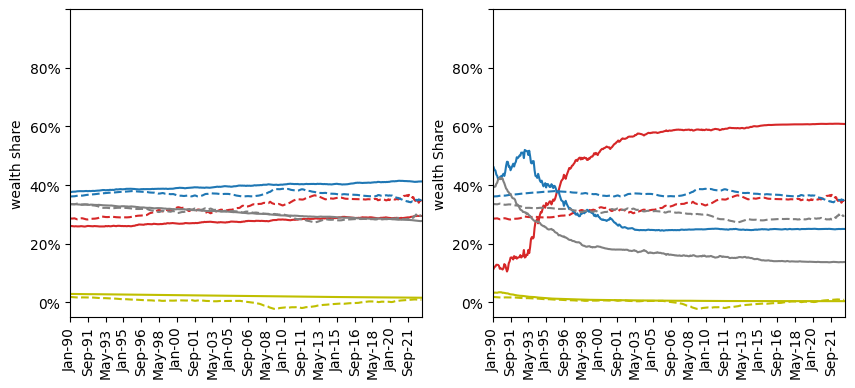

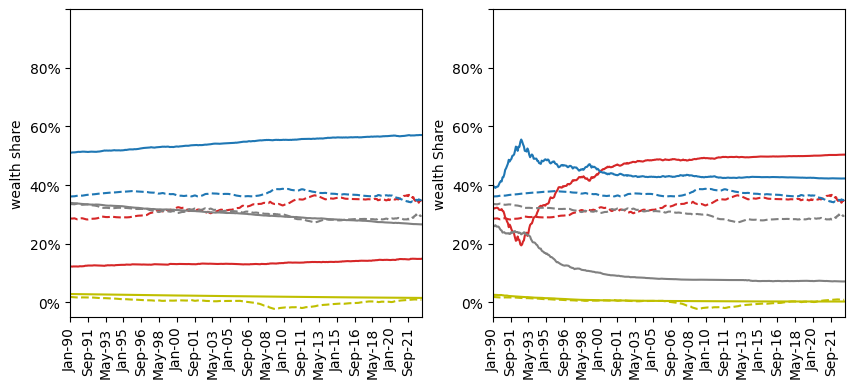

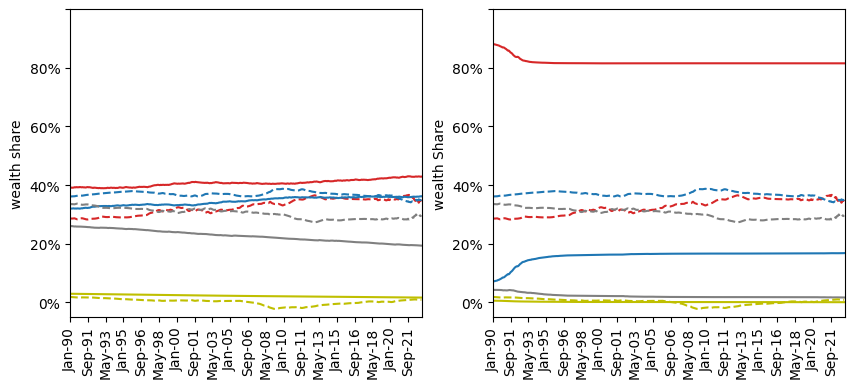

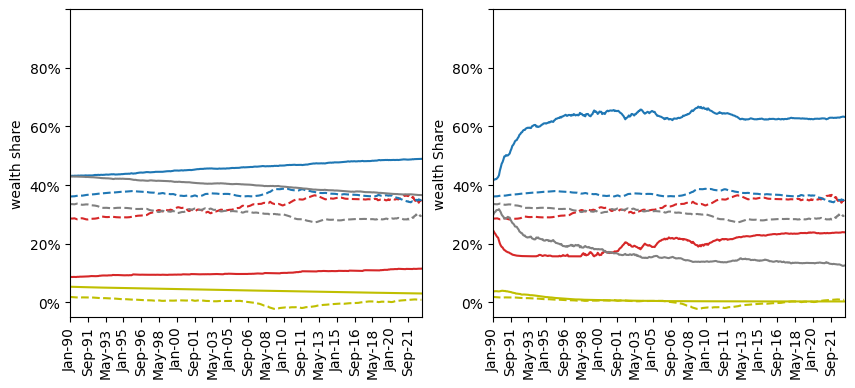

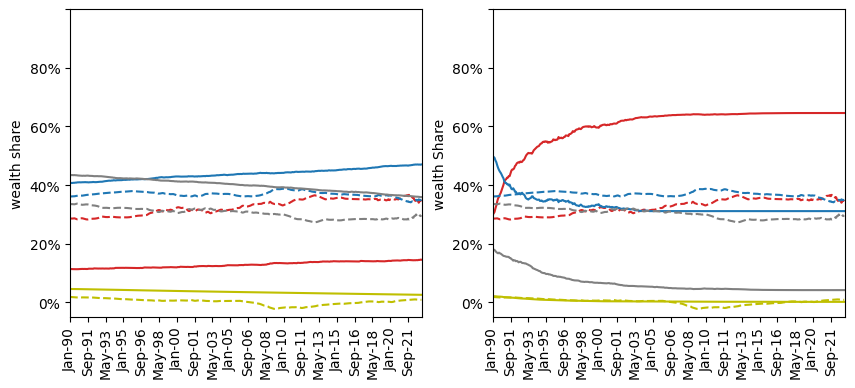

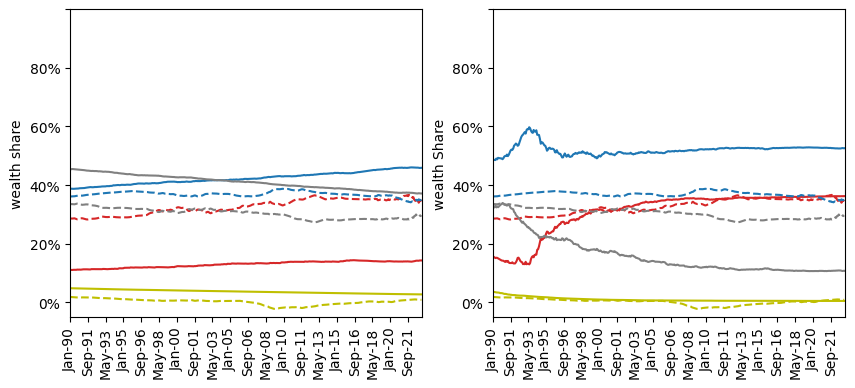

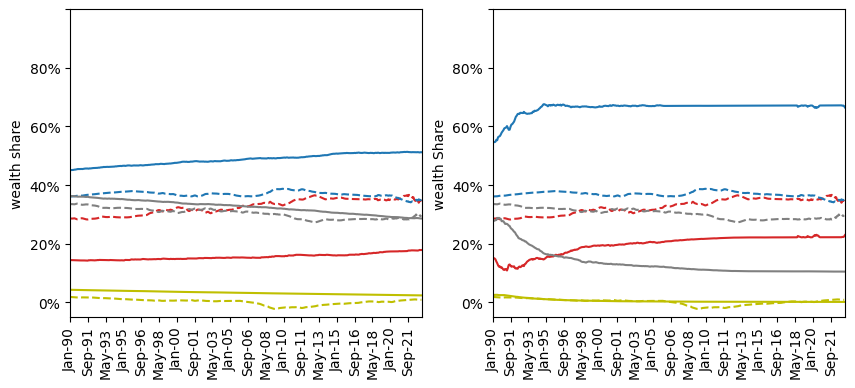

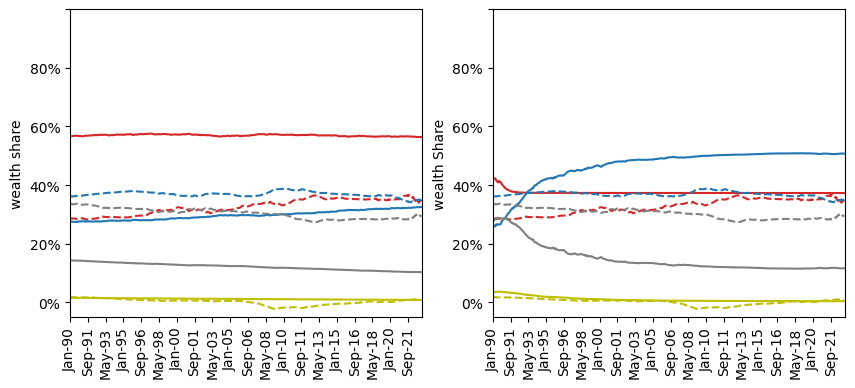

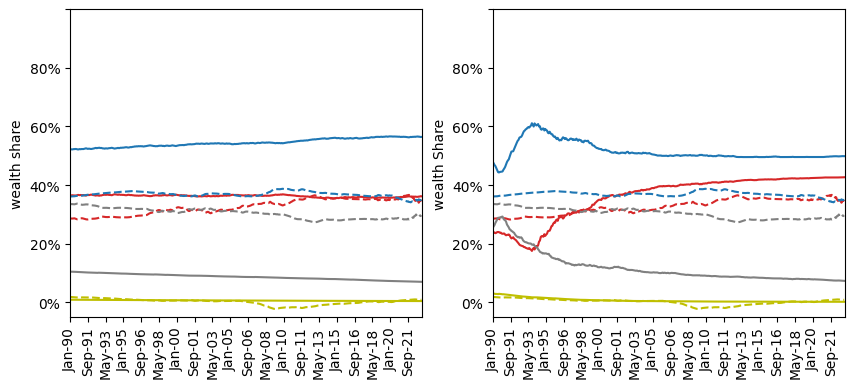

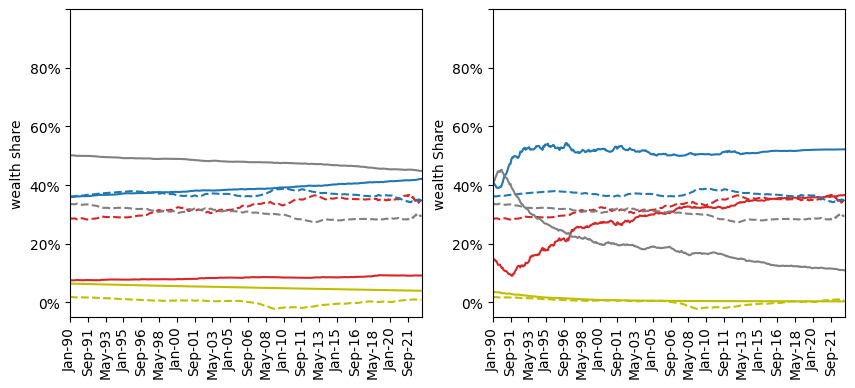

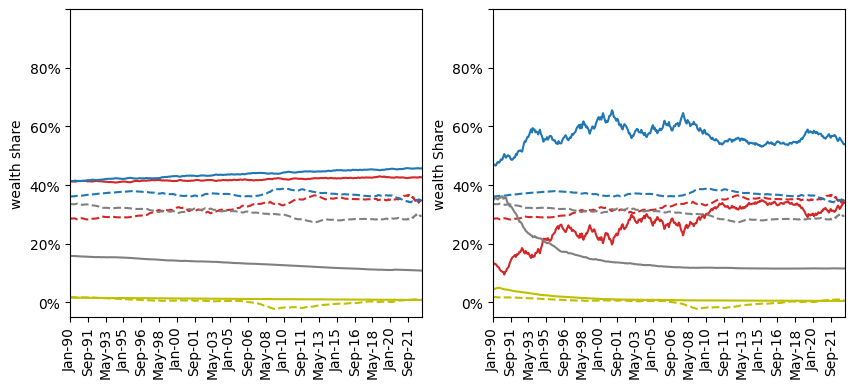

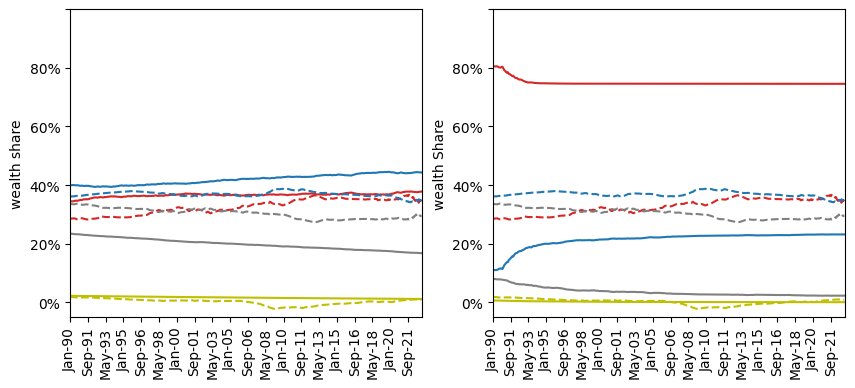

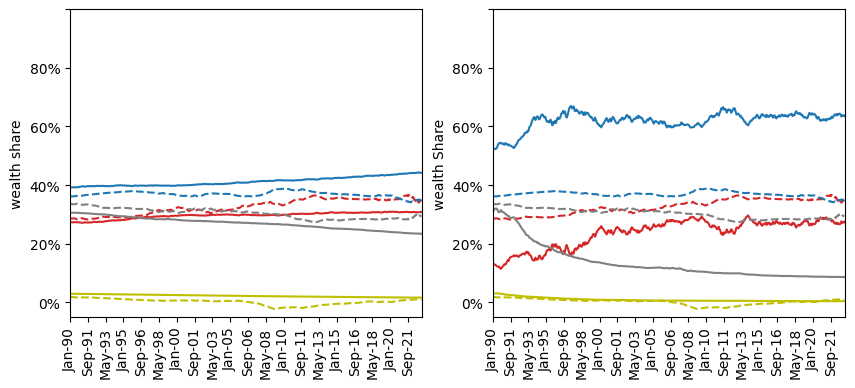

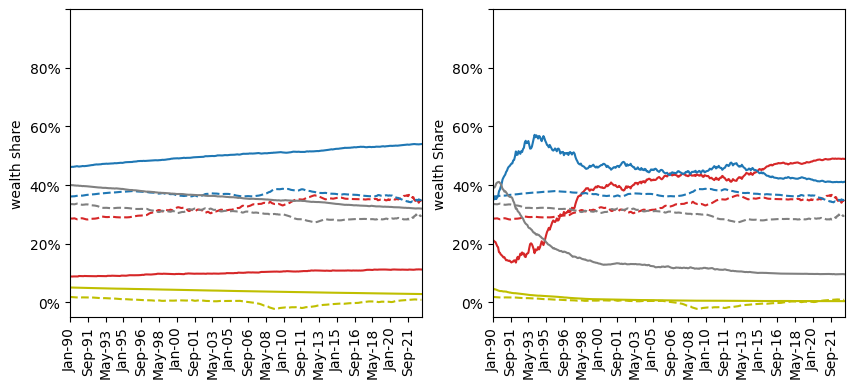

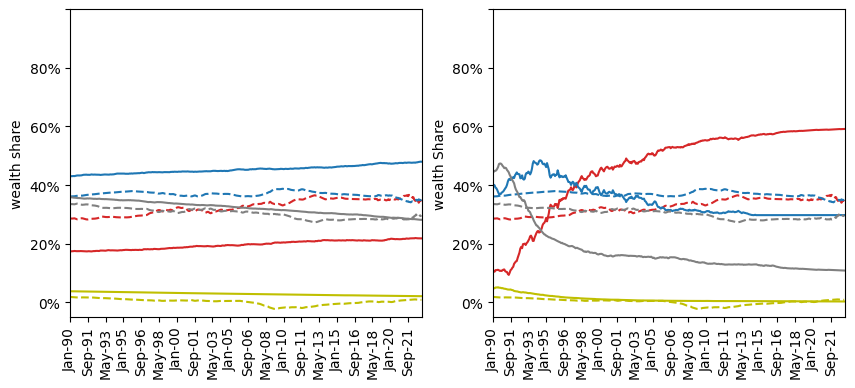

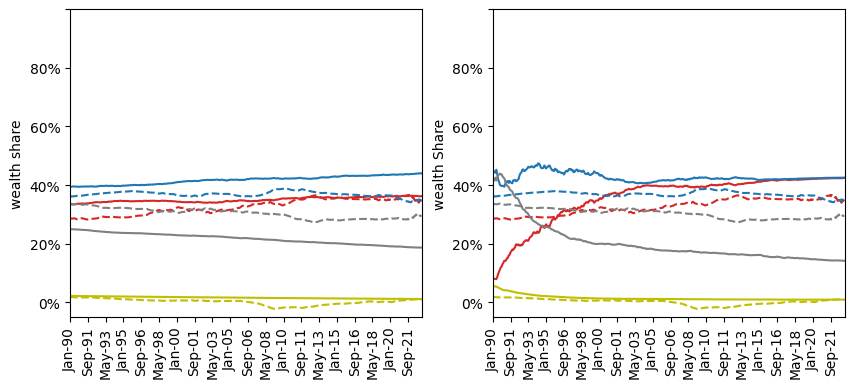

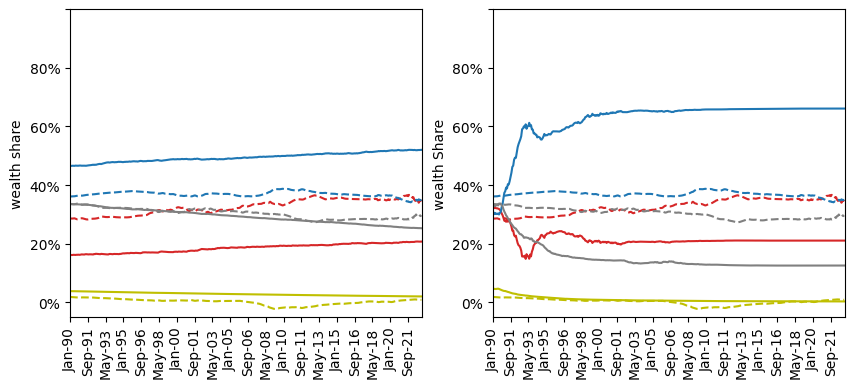

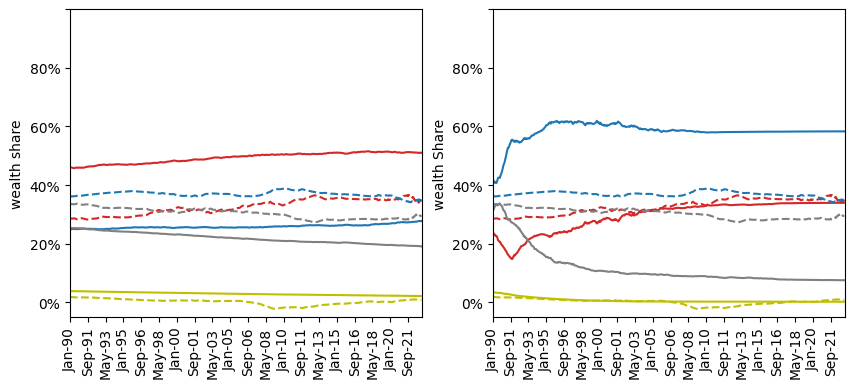

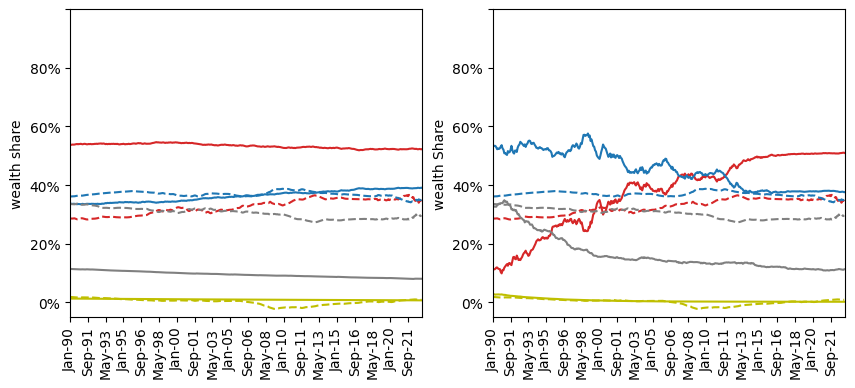

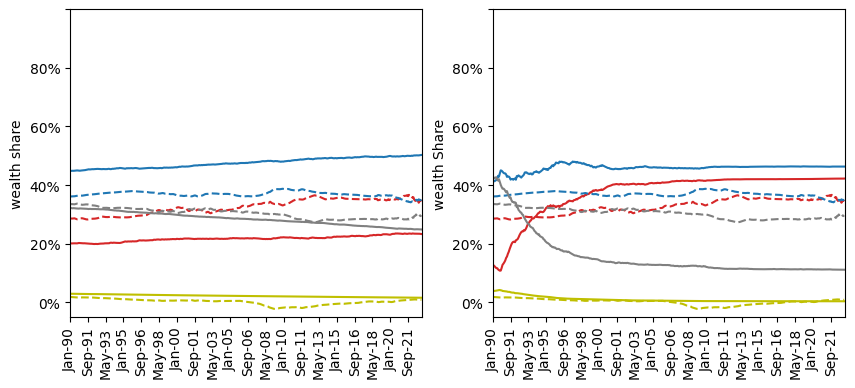

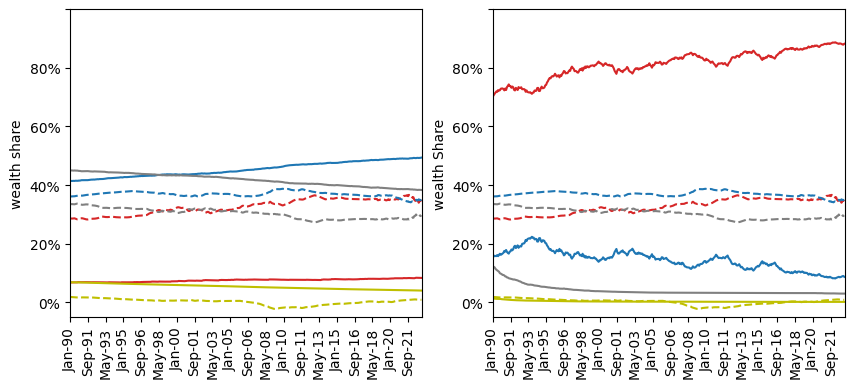

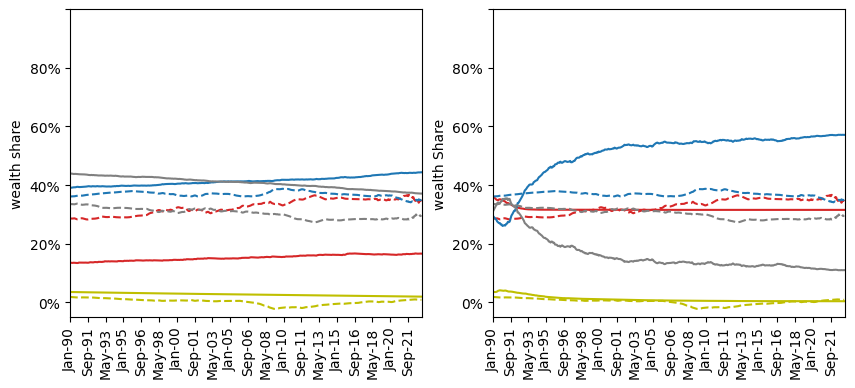

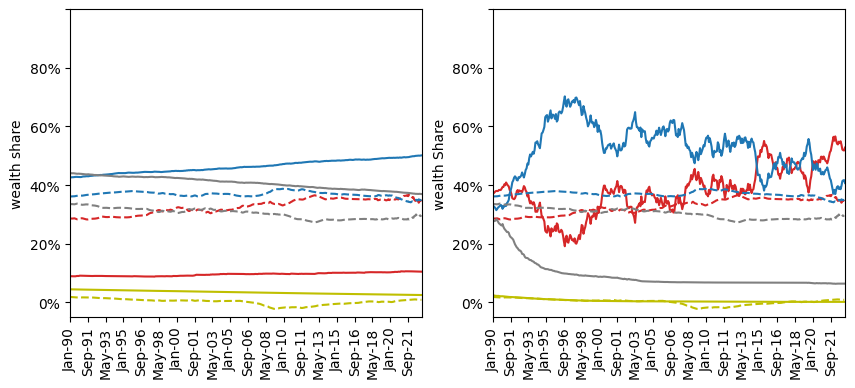

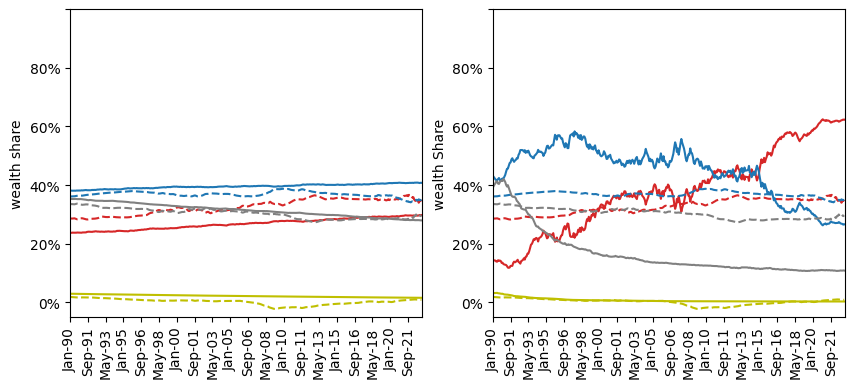

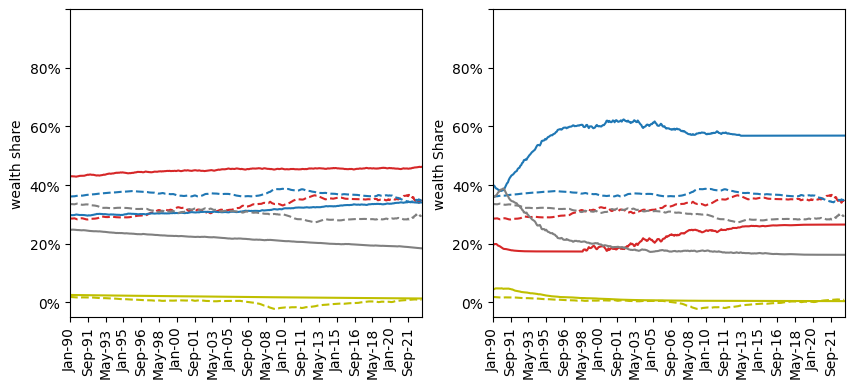

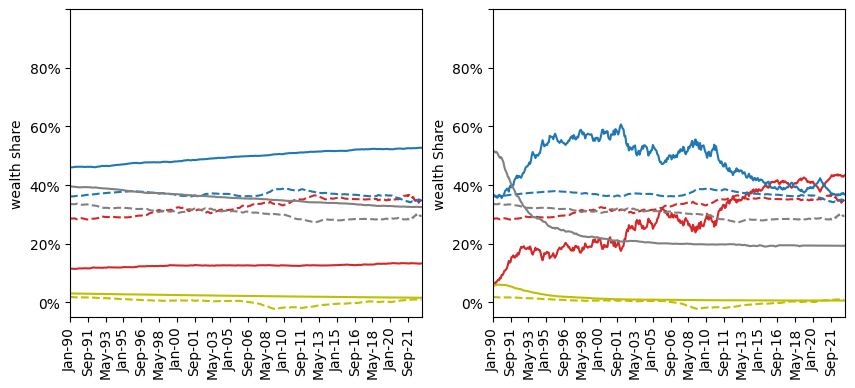

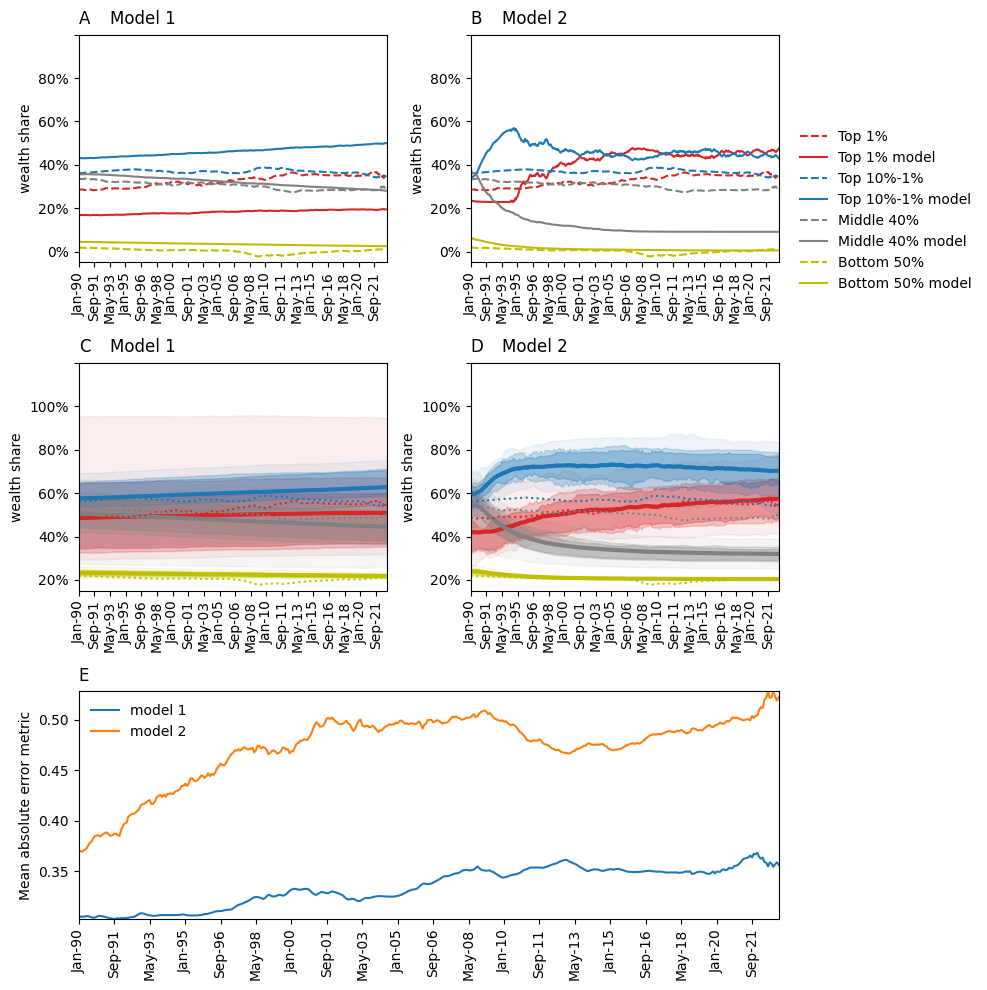

In [1]:
#General packages
import os
import numpy as np
from tqdm import tqdm  ### package for progress bars
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
### MODEL 1 infrastructure
from model1_class import Model1
from run_enkf import *
### MODEL 2 infrastructure
from model2_class import Model2
import pandas as pd
from benchmarking_error_simple import benchmarking_error_simple

#%% benchmarking fangraph of both models 

start_year = 1990
end_year = 2022

# Define the period length should be end_year + 1 because you want to include start and final year in the period
period_length = ((end_year+1)-start_year)*12
print("period length is ", period_length)

model_params1 = {"population_size": 100,
                "growth_rate": 0.025,
                "b_begin": 1.3,
                "distribution": "exponential_pareto", # either "Pareto_lognormal" or "exponential_pareto"
                "start_year": start_year,
                "uncertainty_para": 0.1}

model_params2 = {"population_size": 100, 
                "concavity": 1,
                "growth_rate": 0.025, 
                "distribution": "exponential_pareto", # either "Pareto_lognormal" or "exponential_pareto"
                "start_year": start_year,
                "adaptive_sensitivity": 0.02,
                "uncertainty_para": 0}

### set filter frequency so high that it is not used

enkf1 = prepare_enkf(Model1, model_params1, uncertainty_obs = 0.05, ensemble_size=30, macro_state_dim=4, filter_freq=2000)
enkf2 = prepare_enkf(Model2, model_params2, uncertainty_obs = 0.05, ensemble_size=30, macro_state_dim=4, filter_freq=2000)
run_enkf(enkf1, start_year, end_year, filter_freq = 2000)
run_enkf(enkf2, start_year, end_year, filter_freq = 2000)

#### RUN BENCHMARK CLASS FROM ABOVE WHICH IS DIFFERENT FROM THE PREPARE ENKF 
benchmark = benchmarking_error_simple(30, distribution_model1 = "exponential_pareto", distribution_model2 = "exponential_pareto")
benchmark.collect_data(start_year, end_year)
benchmark.compute_error(start_year=start_year, end_year=end_year)   

# Now let's say you want to integrate this into another grid layout
fig = plt.figure(figsize=(10, 10))
# Create a gridspec object
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
# Create individual subplots
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1])
ax4 = plt.subplot(gs[2, :])  # This one spans both columns


enkf1.models[0].plot_wealth_groups_over_time(ax0, start_year, end_year)
enkf2.models[0].plot_wealth_groups_over_time(ax1, start_year, end_year)
enkf1.plot_fanchart(ax2)
enkf2.plot_fanchart(ax3)
benchmark.plot_graph(ax4)

###EXTRAS
#AX0
ax0.text(0, 1.05, 'A', fontsize = 12)
ax0.text(40, 1.05, 'Model 1', fontsize = 12)

#AX1
ax1.legend(loc=(1.05, -0.15), frameon = False)
ax1.text(0, 1.05, 'B', fontsize = 12)
ax1.text(40, 1.05, 'Model 2', fontsize = 12)

#AX2
ax2.text(0,1.05, 'C', fontsize = 12)
ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax2.text(40,1.05, 'Model 1', fontsize = 12)

#AX3
ax3.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax3.text(0,1.05, 'D', fontsize = 12)
ax3.text(40, 1.05, 'Model 2', fontsize = 12)

#AX4
# Get the limits
x_min, x_max = ax4.get_xlim()
y_min, y_max = ax4.get_ylim()
ax4.text(0,y_max+0.01, 'E', fontsize = 12)
plt.tight_layout()
plt.savefig('fig2.png', dpi = 300)
plt.show()

## For model 2 investigate agent wealth trajectories to see whether positive or negative at times

In [2]:
help = enkf1.micro_history